# Data Analytics - Challenge


The goal of this challenge is to analyze a restaurant invoices. Some celles are already implemented, you just need to **run** them. Some other cells need you to write some code.

Start the challenge by running the two following cells:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

In [3]:
tips_df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


---

❓ Display the 10 first rows of the dataset (no need to sort)

<details>
    <summary>🙈 Reveal solution</summary>

<p>
You can use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html"><code>pandas.DataFrame.head()</code></a> function:
    
<pre>
tips_df.head(10)
</pre>
</p>
</details>

---

❓ How many days per week is the restaurant open?

<details>
    <summary>🙈 Reveal solution</summary>

<p>
You can use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html"><code>pandas.Series.unique()</code></a> function combiend with the <code>len()</code> Python built-in.
    
<pre>
len(tips_df['day'].unique())
</pre>
</p>
</details>

In [8]:
# Your code here
len(tips_df['day'].unique())

4

---

❓ What day of the week is there more bills? Plot this with a Seaborn Countplot.

<details>
    <summary>🙈 Reveal solution</summary>

<p>
<pre>
tips_df['day'].value_counts()
</pre>
    
<pre>
sns.countplot(data=tips_df, x='day', order=['Thur', 'Fri', 'Sat', 'Sun'])
</pre>
</p>
</details>

In [11]:
tips_df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

<AxesSubplot:xlabel='day', ylabel='count'>

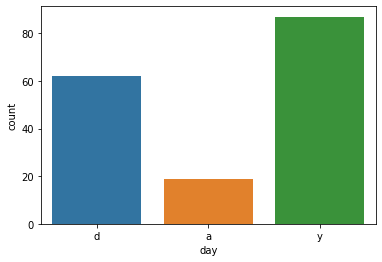

In [14]:
sns.countplot(data=tips_df, x='day', order=['Thur', 'Fri', 'Sat', 'Sun'])


<AxesSubplot:xlabel='day', ylabel='count'>

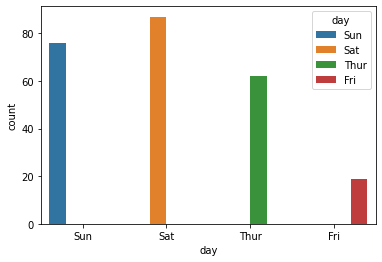

In [23]:
sns.countplot(data=tips_df, x='day' , hue = 'day') 

---

❓ Try to do some other countplots, varying `x` with one of the categorical column (`sex`, `smoker`, `time`)


<AxesSubplot:xlabel='time', ylabel='count'>

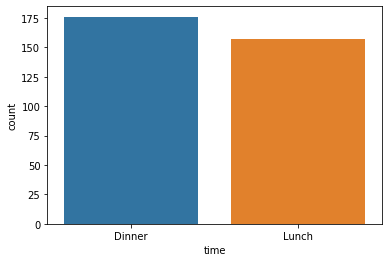

In [21]:
column = ['sex','smoker','time']
sns.countplot(data=tips_df , x= 'smoker' )


<AxesSubplot:xlabel='time', ylabel='count'>

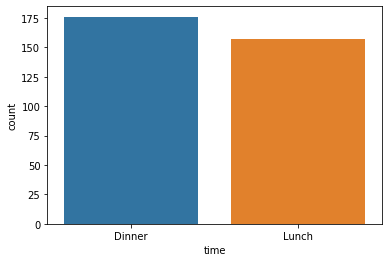

In [22]:
sns.countplot(data= tips_df , x = 'sex')


<AxesSubplot:xlabel='time', ylabel='count'>

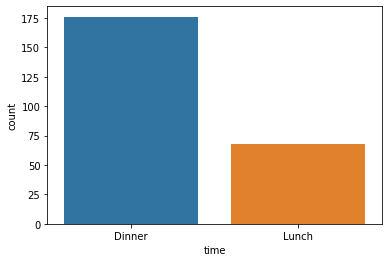

In [29]:
sns.countplot(data= tips_df , x = 'time')


---
❓ Let's plot the distribution of `total_bill` based on a given category. Start with `day`:

```python
sns.catplot(data=tips_df, x='day', y='total_bill', kind="box")
```

1. Change the value of `x` with one of the categorical column of the dataset and the value of `kind` (`"bar"`, `"box"`, `"violin"`, `"boxen"`)
1. Change the value of `y` with one of the numerical column of the dataset

In [37]:
# Your experiments here
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


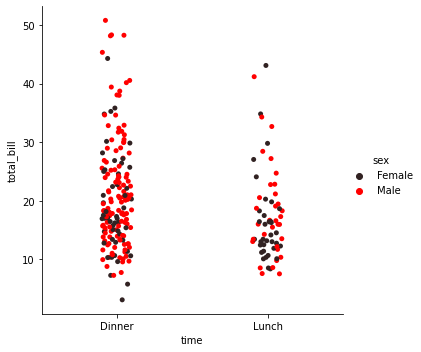

In [42]:
sns.catplot(data=tips_df, x = 'time',  y = 'total_bill', hue = 'sex', palette='dark:red' )

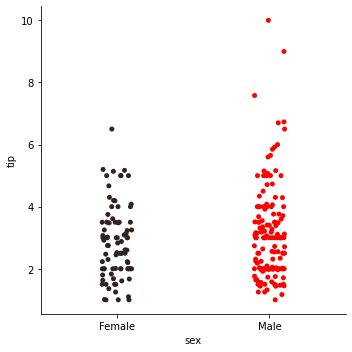

In [41]:
sns.catplot(data=tips_df, x = 'sex',  y = 'tip', hue = 'sex', palette='dark:red' )

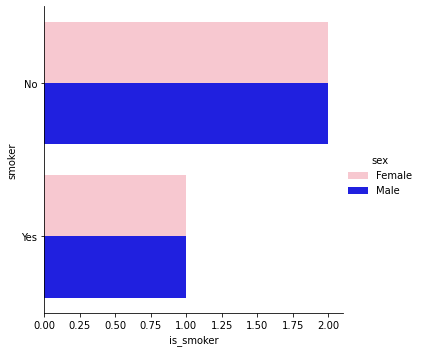

In [70]:
colr = ['pink','blue']
tips_df['is_smoker'] = tips_df['smoker'].apply(lambda x: 1 if x == 'Yes' else 2)
sns.catplot(data=tips_df, x = 'is_smoker' ,  y = 'smoker',kind = 'bar', hue = 'sex', palette= colr )

<AxesSubplot:xlabel='count', ylabel='smoker'>

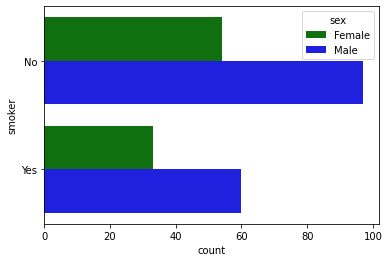

In [61]:
colr = ['green','blue']
sns.countplot(data=tips_df, y = 'smoker', hue = 'sex', palette= colr )

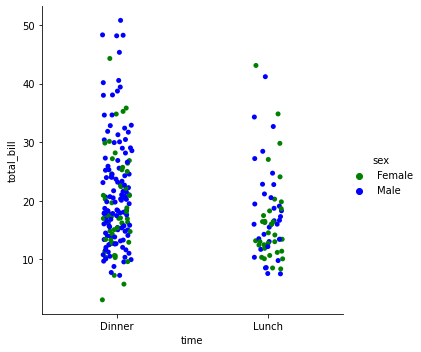

In [43]:
colr = ['green','blue']
sns.catplot(data=tips_df, x = 'time',  y = 'total_bill', hue = 'sex', palette= colr )


---
❓ Let's use [`seaborn.FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

1. Run the cell below. What do you observe?
2. Change `col` in the first line with another column (e.g. `"time"`). Run the cell again. What do you observe?

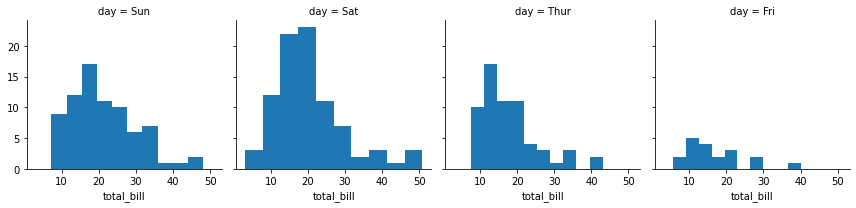

In [73]:
g = sns.FacetGrid(tips_df, col="day")
g.map(plt.hist, "total_bill")

---
❓ Let's continue with FacetGrid and add a `row="smoker"` parameter. How many cells do you get in the plot?

<details>
    <summary>🙈 Reveal solution</summary>

You get 2 * 4 = 8 cells!
    
<pre>
g = sns.FacetGrid(tips_df, col="day", row="smoker")
g.map(plt.hist, "total_bill")
</pre>
</p>
</details>

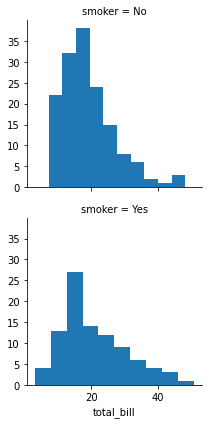

In [77]:
# Your code here

g = sns.FacetGrid(tips_df , row = "smoker")
g.map(plt.hist,"total_bill")

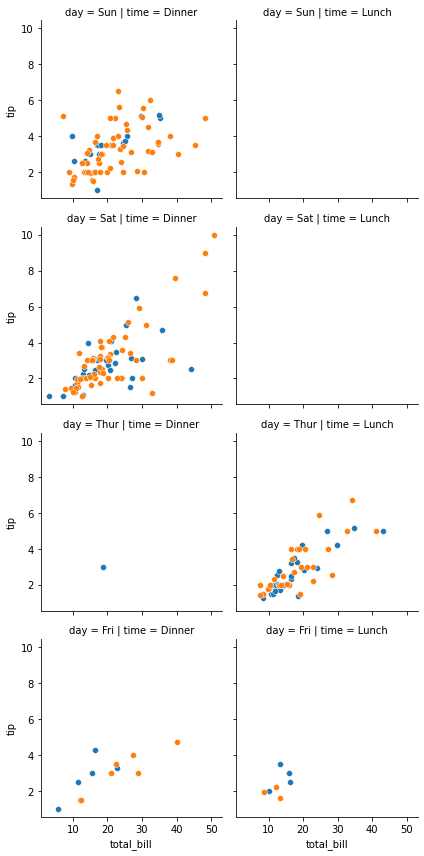

In [89]:
g = sns.FacetGrid(tips_df, col="time",  row="day" , hue = "sex" )
g.map(sns.scatterplot, "total_bill", "tip")

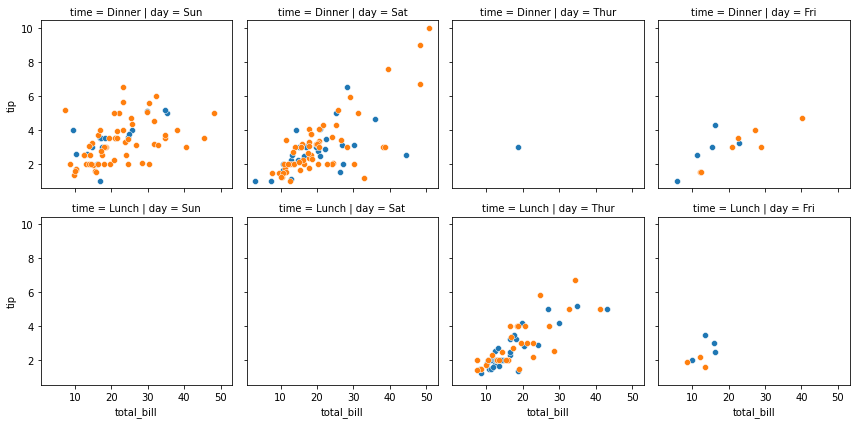

In [93]:
g = sns.FacetGrid(tips_df, col="day",  row="time" , hue = "sex" , despine = False )
g.map(sns.scatterplot, "total_bill", "tip")


## Correlation

Let's start looking for correlation between columns in the dataset.


---
❓ What is your intuition about the relationship between the columns `tip` and `total_bill`?

---
❓ Let's look at the data to see if our intuition is correct. We will do a **scatterplot** with `x` being `total_bill` and `y` the tip.

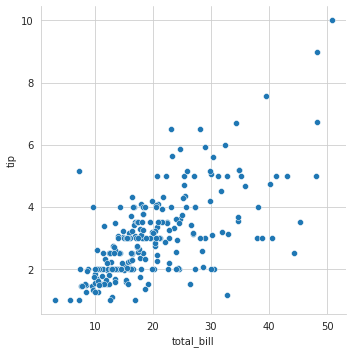

In [94]:
with sns.axes_style(style="whitegrid"):
    sns.relplot(x="total_bill", y="tip", data=tips_df)

---
❓ Another way of looking at this data is to use a [`seaborn.jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html).

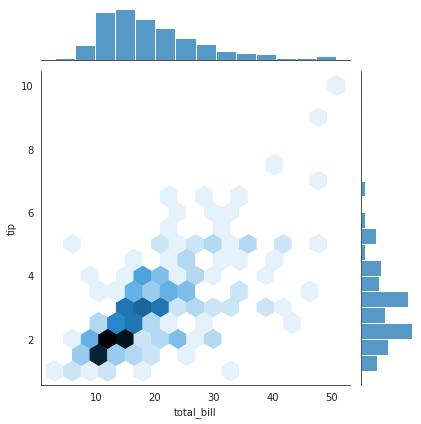

In [101]:
with sns.axes_style("white"):
    sns.jointplot(x="total_bill", y="tip", kind="hex", data=tips_df)

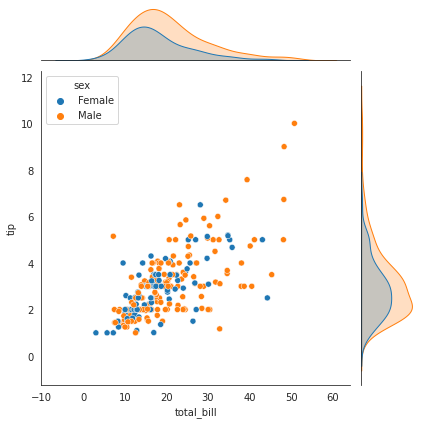

In [100]:
with sns.axes_style("white"):
    sns.jointplot(x="total_bill", y="tip", hue = "sex" ,  data=tips_df)

❓ A very useful tool to **identify** correlations is the [`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html):

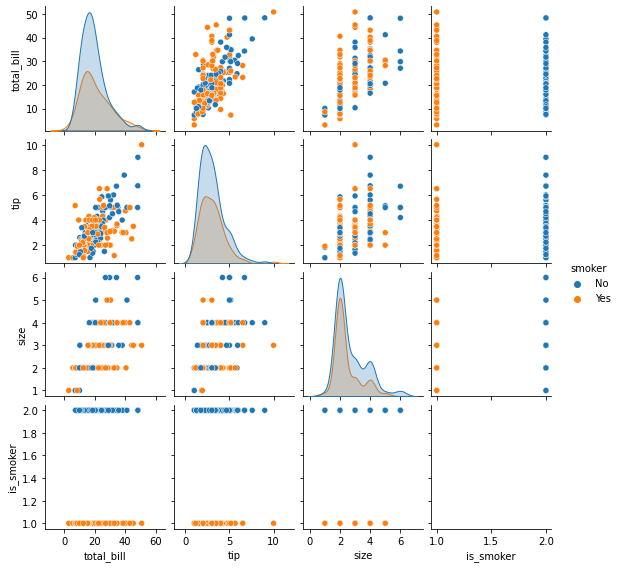

In [97]:
sns.pairplot(tips_df, height=2, hue="smoker")

## Regression

We are not doing Machine Learning yet but we can use [`seaborn.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to graphically read a linear correlation between two columns:

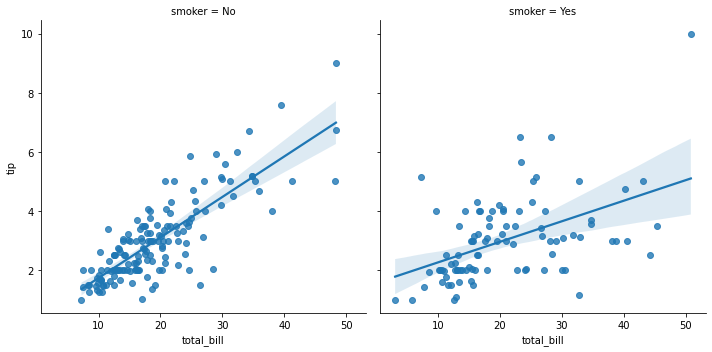

In [102]:
sns.lmplot(x="total_bill", y="tip", col="smoker", data=tips_df)

## Good job!

Save your notebook, go back to the **Le Wagon - Learn** platform to upload your progress. A quiz awaits you!